<a href="https://colab.research.google.com/github/syphax/CrounseCode/blob/master/MA_Towns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

from shapely.geometry import Polygon, LineString


In [4]:
path = os.path.join('drive', 'MyDrive', 'Data', 'Mass GIS', 'townssurvey_shp')

df_towns_p = gpd.read_file(os.path.join(path, 'TOWNSSURVEY_POLY.shp'))

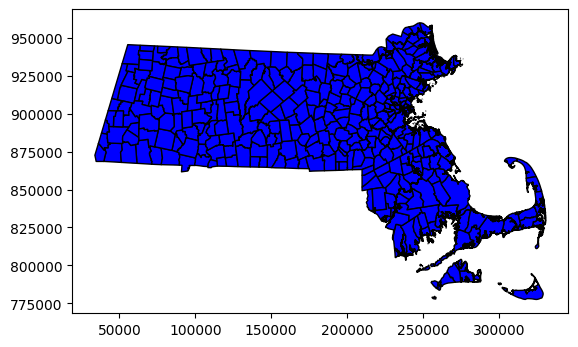

In [8]:
df_towns_p.plot(color='blue', edgecolor='black')

plt.show()

In [18]:
df_local = df_towns_p[df_towns_p['TOWN'].isin(['CONCORD', 'ACTON', 'LINCOLN'])]


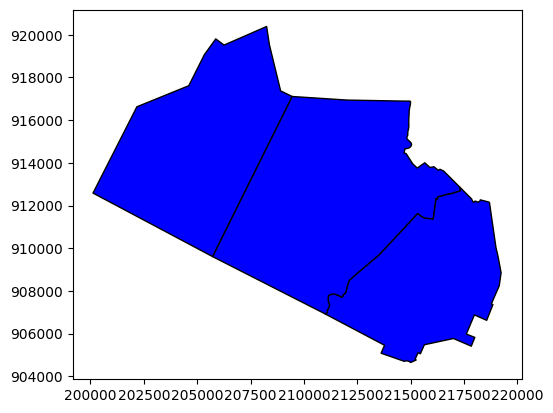

In [19]:
df_local.plot(color='blue', edgecolor='black')

plt.show()

In [20]:
# Decompose polygons to edges

def polygon_to_segments(polygon):
    """Converts a polygon to its constituent line segments."""
    exterior_coords = polygon.exterior.coords
    return [LineString([exterior_coords[i], exterior_coords[i + 1]]) for i in range(len(exterior_coords) - 1)]

def blow_up_polygons(_df):

# New DataFrame to store segments
  _segments_gdf = gpd.GeoDataFrame(columns=_df.columns)

  for index, row in _df.iterrows():
      # Get segments from the polygon
      segments = polygon_to_segments(row['geometry'])

      # Create a new row for each segment
      for segment in segments:
          new_row = row.copy()
          new_row['geometry'] = segment
          _segments_gdf = _segments_gdf.append(new_row, ignore_index=True)

  return _segments_gdf

In [23]:
df_segs = blow_up_polygons(df_local)

<ipython-input-20-8d342b5350be>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _segments_gdf = _segments_gdf.append(new_row, ignore_index=True)


In [24]:
df_segs

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,ISLAND,COASTAL_PO,FOURCOLOR,...,FIPS_MCD,FIPS_COUNT,ACRES,SQUARE_MIL,POP2010,POPCH00_10,POPCH80_90,SHAPE_AREA,SHAPE_LEN,geometry
0,LINCOLN,157,7464,7666,8056,390,T,0,NO,2,...,25017120,17,9587.925,14.981,6362,-1694,202,3.880094e+07,28930.007681,"LINESTRING (218695.742 912155.495, 219003.983 ..."
1,LINCOLN,157,7464,7666,8056,390,T,0,NO,2,...,25017120,17,9587.925,14.981,6362,-1694,202,3.880094e+07,28930.007681,"LINESTRING (219003.983 910022.385, 219091.822 ..."
2,LINCOLN,157,7464,7666,8056,390,T,0,NO,2,...,25017120,17,9587.925,14.981,6362,-1694,202,3.880094e+07,28930.007681,"LINESTRING (219091.822 909653.285, 219232.193 ..."
3,LINCOLN,157,7464,7666,8056,390,T,0,NO,2,...,25017120,17,9587.925,14.981,6362,-1694,202,3.880094e+07,28930.007681,"LINESTRING (219232.193 908906.695, 219243.102 ..."
4,LINCOLN,157,7464,7666,8056,390,T,0,NO,2,...,25017120,17,9587.925,14.981,6362,-1694,202,3.880094e+07,28930.007681,"LINESTRING (219243.102 908848.105, 219155.852 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,CONCORD,67,16455,17076,16993,-83,T,0,NO,3,...,25017070,17,16532.471,25.832,17668,675,621,6.690456e+07,36342.971523,"LINESTRING (210886.422 906978.875, 205727.133 ..."
302,CONCORD,67,16455,17076,16993,-83,T,0,NO,3,...,25017070,17,16532.471,25.832,17668,675,621,6.690456e+07,36342.971523,"LINESTRING (205727.133 909604.155, 209456.373 ..."
303,CONCORD,67,16455,17076,16993,-83,T,0,NO,3,...,25017070,17,16532.471,25.832,17668,675,621,6.690456e+07,36342.971523,"LINESTRING (209456.373 917108.875, 212035.943 ..."
304,CONCORD,67,16455,17076,16993,-83,T,0,NO,3,...,25017070,17,16532.471,25.832,17668,675,621,6.690456e+07,36342.971523,"LINESTRING (212035.943 916940.955, 214675.682 ..."


In [31]:
df_segs[df_segs['TOWN'].isin(['CONCORD', 'ACTON'])]

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,ISLAND,COASTAL_PO,FOURCOLOR,...,FIPS_MCD,FIPS_COUNT,ACRES,SQUARE_MIL,POP2010,POPCH00_10,POPCH80_90,SHAPE_AREA,SHAPE_LEN,geometry
127,ACTON,2,17672,17872,20331,2459,T,0,NO,2,...,25017005,17,12988.988,20.295,21924,1593,200,5.256453e+07,30789.187913,"LINESTRING (209456.373 917108.875, 205727.133 ..."
128,ACTON,2,17672,17872,20331,2459,T,0,NO,2,...,25017005,17,12988.988,20.295,21924,1593,200,5.256453e+07,30789.187913,"LINESTRING (205727.133 909604.155, 202934.422 ..."
129,ACTON,2,17672,17872,20331,2459,T,0,NO,2,...,25017005,17,12988.988,20.295,21924,1593,200,5.256453e+07,30789.187913,"LINESTRING (202934.422 911088.745, 200119.502 ..."
130,ACTON,2,17672,17872,20331,2459,T,0,NO,2,...,25017005,17,12988.988,20.295,21924,1593,200,5.256453e+07,30789.187913,"LINESTRING (200119.502 912582.715, 202175.852 ..."
131,ACTON,2,17672,17872,20331,2459,T,0,NO,2,...,25017005,17,12988.988,20.295,21924,1593,200,5.256453e+07,30789.187913,"LINESTRING (202175.852 916626.615, 204607.352 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,CONCORD,67,16455,17076,16993,-83,T,0,NO,3,...,25017070,17,16532.471,25.832,17668,675,621,6.690456e+07,36342.971523,"LINESTRING (210886.422 906978.875, 205727.133 ..."
302,CONCORD,67,16455,17076,16993,-83,T,0,NO,3,...,25017070,17,16532.471,25.832,17668,675,621,6.690456e+07,36342.971523,"LINESTRING (205727.133 909604.155, 209456.373 ..."
303,CONCORD,67,16455,17076,16993,-83,T,0,NO,3,...,25017070,17,16532.471,25.832,17668,675,621,6.690456e+07,36342.971523,"LINESTRING (209456.373 917108.875, 212035.943 ..."
304,CONCORD,67,16455,17076,16993,-83,T,0,NO,3,...,25017070,17,16532.471,25.832,17668,675,621,6.690456e+07,36342.971523,"LINESTRING (212035.943 916940.955, 214675.682 ..."


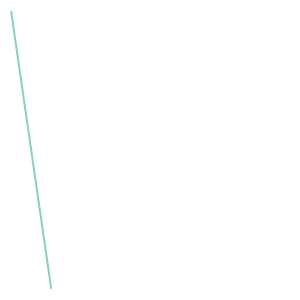